In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [2]:
X = load_boston().data
Y = load_boston().target

In [3]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [4]:
clf = SGDRegressor()
clf.fit(X, Y)
print(mean_squared_error(Y, clf.predict(X)))

22.887914540599784


# Implement own SGD Regressor

In [5]:
X = load_boston().data
Y = load_boston().target

In [6]:
from numpy import *
nan_value = isnan(Y)
Y = nan_to_num(Y) 

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3)

In [8]:
from sklearn.preprocessing import StandardScaler 
import numpy as np
s=StandardScaler()
x_train=s.fit_transform(np.array(x_train))
x_test=s.transform(np.array(x_test))

In [9]:
## Convert the data into pandas dataframe format

In [10]:
manual_train=pd.DataFrame(data=x_train)
manual_train['price']=y_train

In [11]:
manual_train.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,price
0,-0.413785,-0.467989,-1.126912,-0.275659,-0.581529,0.205448,0.159679,-0.312677,-0.868385,-0.825930,-0.319537,0.429152,-0.640416,22.0
1,-0.410687,-0.467989,-1.301505,-0.275659,-0.844627,1.241217,-0.541561,1.048157,-0.754361,-1.108405,0.103766,0.463999,-1.019826,36.2
2,-0.416740,1.857029,-1.291569,-0.275659,-1.430232,0.272452,-1.335351,1.618634,-0.982409,-0.649383,-1.495379,0.441323,-0.636450,22.0


In [12]:
x_test=np.array(x_test)
y_test=np.array(y_test)

In [27]:
## function to return weight(w) and bias(b) and mean squared error
def manual_fit(X, lr_rate_variation, alpha=0.0001, lr_rate=1, power_t=0.25, n_iter=100):
    w_new=np.zeros(shape=(1,13))
    b_new=0
    t=1
    r=lr_rate
    
    while(t<=n_iter):
        w_old=w_new
        b_old=b_new
        w_=np.zeros(shape=(1,13))
        b_=0
        x_data=X.sample(10)## we are implementing the sgd with batch size 10
        x=np.array(x_data.drop('price',axis=1))
        y=np.array(x_data['price'])
        
        
        # for getting the derivatives using sgd with k=10
        for i in range(10):  
            y_curr=np.dot(w_old,x[i])+b_old
            w_+=x[i] * (y[i] - y_curr)
            b_+=(y[i]-y_curr)
            
            
        w_*=(-2/x.shape[0])
        b_*=(-2/x.shape[0])
        
        #updating the parameters
        w_new=(w_old-r*w_)
        b_new=(b_old-r*b_)
        
        
        if(lr_rate_variation=='invscaling'):
            r = lr_rate / pow(t, power_t)
        t+=1
        
    return w_new, b_new



def pred(x,w, b):
    y_pred=[]
    for i in range(len(x)):
        y=np.asscalar(np.dot(w,x[i])+b)
        y_pred.append(y)
    return np.array(y_pred)


def plot_(test_data,y_pred):
    #scatter plot
    plt.scatter(y_test,y_pred)
    plt.grid(b=True, linewidth=0.3)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.show()
    print('**************************************************************')
    
    
       
    manual_error=mean_squared_error(y_test,y_pred)
    print('error=',manual_error)
    
    return manual_error

In [28]:
w, b=manual_fit(X=manual_train, lr_rate_variation='constant' ,lr_rate=1, n_iter=100)

In [29]:
y_pred=pred(x_test, w=w, b=b)

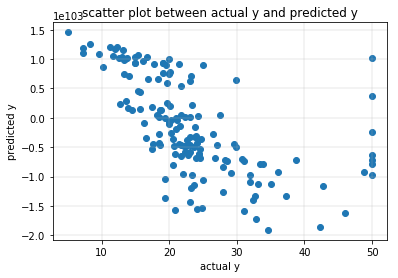

**************************************************************
error= 6.946691184155619e+205


In [30]:
manual_error=plot_(x_test,y_pred)

In [31]:
print('manual sgd weight---\n',w)

manual sgd weight---
 [[ 6.06119901e+101 -1.67303892e+102  1.26106398e+102 -1.02105566e+102
   1.02220338e+102 -8.93565611e+101  1.11547957e+102 -9.01932874e+101
   1.09588324e+102  1.15497174e+102  1.63917130e+102 -5.39643116e+100
   6.62430027e+101]]


In [32]:
print('manual sgd intercept=',b)

manual sgd intercept= [-5.74545373e+101]


In [33]:
####With lr_rate = 0.5

In [34]:
w, b=manual_fit(X=manual_train, lr_rate_variation='constant' ,lr_rate=0.5, n_iter=100)

In [35]:
y_pred=pred(x_test, w=w, b=b)

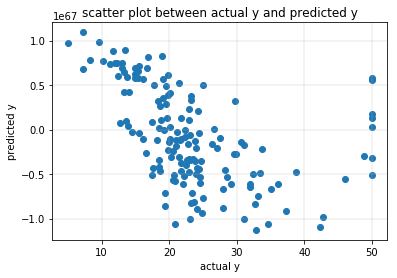

**************************************************************
error= 2.9817544853516763e+133


In [36]:
manual_error=plot_(x_test,y_pred)

In [37]:
print('manual sgd weight---\n',w)

manual sgd weight---
 [[ 5.42678290e+65 -7.53490387e+65  7.50601637e+65  4.16317694e+65
   8.76201616e+65 -4.61783038e+65  9.19448892e+65 -1.11103286e+66
   5.60139385e+65  6.24142717e+65  2.22924520e+65 -8.88010942e+65
   6.65252704e+65]]


In [38]:
print('manual sgd intercept=',b)

manual sgd intercept= [-4.23064108e+64]


In [ ]:
####With lr_rate = 0.25

In [44]:
w, b=manual_fit(X=manual_train, lr_rate_variation='constant' ,lr_rate=0.25, n_iter=100)

In [45]:
y_pred=pred(x_test, w=w, b=b)

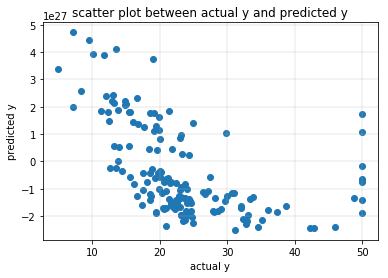

**************************************************************
error= 2.9382620481739005e+54


In [46]:
manual_error=plot_(x_test,y_pred)

In [47]:
print('manual sgd weight---\n',w)

manual sgd weight---
 [[ 4.86452722e+26  5.75973651e+25  2.64096557e+26 -8.86060538e+25
   7.14141415e+25 -9.15598072e+25  3.08296191e+26 -2.03126445e+26
   2.58616405e+26  2.75122306e+26  1.42701128e+26 -6.60868825e+26
   4.02981256e+25]]


In [48]:
print('manual sgd intercept=',b)

manual sgd intercept= [-7.9599668e+25]


In [42]:
####With lr_rate = 0.125

In [49]:
w, b=manual_fit(X=manual_train, lr_rate_variation='constant' ,lr_rate=0.125, n_iter=100)

In [50]:
y_pred=pred(x_test, w=w, b=b)

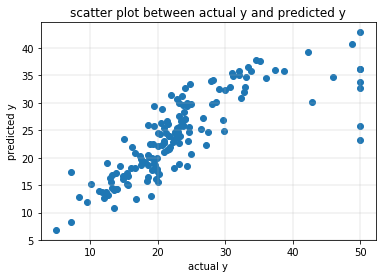

**************************************************************
error= 30.81815674632503


In [51]:
manual_error=plot_(x_test,y_pred)

In [52]:
print('manual sgd weight---\n',w)

manual sgd weight---
 [[-1.4033411   1.30828934  0.02907573 -1.07237761 -2.89600993  2.24596944
  -0.19807648 -3.25751011  2.86619284 -2.33918207 -2.50635907  1.30724662
  -3.179836  ]]


In [53]:
print('manual sgd intercept=',b)

manual sgd intercept= [22.45354933]


In [ ]:
####With lr_rate = 0.0625

In [54]:
w, b=manual_fit(X=manual_train, lr_rate_variation='constant' ,lr_rate=0.0625, n_iter=100)

In [55]:
y_pred=pred(x_test, w=w, b=b)

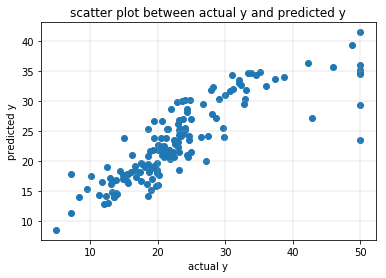

**************************************************************
error= 26.671619418113295


In [56]:
manual_error=plot_(x_test,y_pred)

In [57]:
print('manual sgd weight---\n',w)

manual sgd weight---
 [[-0.91739615  1.30105895 -0.31911097 -0.07150682 -1.89669184  2.0707556
  -0.14831981 -3.56028212  2.13671389 -1.89498387 -2.03674125  0.61409749
  -3.33236213]]


In [58]:
print('manual sgd intercept=',b)

manual sgd intercept= [22.08380125]


# Using SKLEARN SGD regressor¶

In [69]:
## function to return weight(w) and bias(b) and mean squared error using sklearn sgdregressor
def sklearn_sgd(alpha, lr_rate_variation, eta0=1, power_t=0.25, n_iter=100, train_data=x_train, test_data=x_test, train_y=y_train, test_y=y_test):
    clf=SGDRegressor(alpha=alpha, penalty=None, learning_rate=lr_rate_variation, eta0=eta0, power_t=power_t, n_iter=n_iter)
    clf.fit(x_train, y_train)
    y_pred=clf.predict(x_test)
    
    #scatter plot
    plt.scatter(y_test,y_pred)
    plt.title('scatter plot between actual y and predicted y')
    plt.xlabel('actual y')
    plt.ylabel('predicted y')
    plt.grid(b=True, linewidth=0.5)
    plt.show()
    print('***********************************************************')
    
    #kdeplot
    
       
    sgd_error=mean_squared_error(y_test,y_pred)
    print('mean sq error=', sgd_error)
    print('number of iteration=', n_iter)
    
    return clf.coef_, clf.intercept_, sgd_error

/home/chitra/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


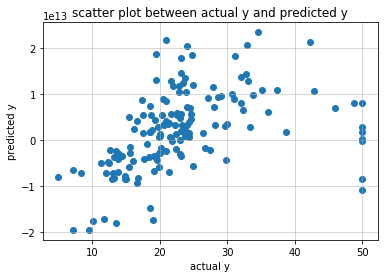

***********************************************************
mean sq error= 7.763428865327137e+25
number of iteration= 100


In [70]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=1, n_iter=100)


In [71]:
print('sklearn sgd weight---\n',w_sgd)

sklearn sgd weight---
 [-1.27425988e+12  1.96618645e+12 -8.42074762e+11 -6.07163339e+11
  6.07023730e+11 -1.73587217e+11 -2.29772620e+12  1.81067659e+12
 -2.35479569e+12  1.80075731e+12 -3.06173447e+12  3.60377894e+12
  1.04156887e+12]


In [72]:
print('sklearn sgd intercept=',b_sgd)

sklearn sgd intercept= [1.14837642e+12]


In [73]:
####With lr_rate = 0.5

/home/chitra/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


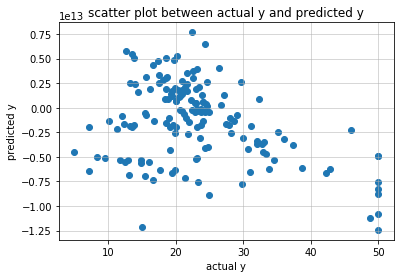

***********************************************************
mean sq error= 1.7910851565042195e+25
number of iteration= 100


In [74]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.5, n_iter=100)

In [75]:
print('sklearn sgd weight---\n',w_sgd)

sklearn sgd weight---
 [-1.52654413e+12 -6.15420313e+11 -3.18910572e+11  9.11242418e+11
 -9.96815272e+11 -2.25723662e+12 -6.36577871e+11  1.96741586e+11
 -1.18684906e+12 -1.01580084e+12  6.29049318e+11 -6.88499609e+11
  2.20837201e+12]


In [76]:
print('sklearn sgd intercept=',b_sgd)

sklearn sgd intercept= [-1.08309974e+12]


In [ ]:
####With lr_rate = 0.25

/home/chitra/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


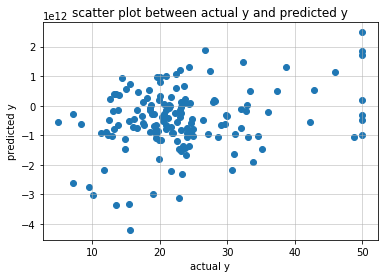

***********************************************************
mean sq error= 1.3455720631292822e+24
number of iteration= 100


In [77]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.25, n_iter=100)

In [78]:
print('sklearn sgd weight---\n',w_sgd)

sklearn sgd weight---
 [ 1.99786673e+11  6.12108168e+10 -6.25254841e+10  4.83762580e+11
 -5.30539957e+11  3.50916681e+11  5.59784291e+11  6.54155991e+10
 -5.62355700e+11  4.18825206e+11  6.90205547e+11  5.89253898e+11
 -2.32375889e+11]


In [79]:
print('sklearn sgd intercept=',b_sgd)

sklearn sgd intercept= [-5.73976803e+11]


In [ ]:
####With lr_rate = 0.125

/home/chitra/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


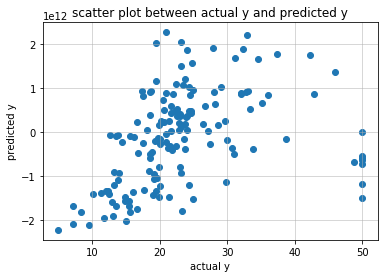

***********************************************************
mean sq error= 1.1454894005558339e+24
number of iteration= 100


In [80]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.125, n_iter=100)

In [81]:
print('sklearn sgd weight---\n',w_sgd)

sklearn sgd weight---
 [-3.00285761e+11  3.76763914e+11 -2.24184347e+11  2.40334882e+11
 -2.33424815e+11 -1.24637211e+11 -2.09807916e+11  1.18551981e+11
 -7.55121081e+09 -1.24112435e+11  6.88658762e+10  9.61953744e+10
  5.08944678e+10]


In [82]:
print('sklearn sgd intercept=',b_sgd)

sklearn sgd intercept= [-2.22501238e+11]


In [83]:
####With lr_rate = 0.0625

/home/chitra/.local/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:152: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


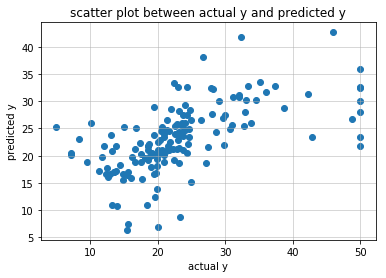

***********************************************************
mean sq error= 57.44240024989603
number of iteration= 100


In [84]:
w_sgd, b_sgd, error_sgd=sklearn_sgd(alpha=0.0001, lr_rate_variation='constant', eta0=0.0625, n_iter=100)

In [85]:
print('sklearn sgd weight---\n',w_sgd)

sklearn sgd weight---
 [ 2.99442149  1.15743694 -1.5303219   2.74891573 -5.20582144  0.32878364
 -0.64837205 -3.72909232  4.58000077 -3.31488487 -1.17840665 -0.17610881
 -1.58478072]


In [86]:
print('sklearn sgd intercept=',b_sgd)

sklearn sgd intercept= [22.6636043]


# Conclusion:

In [1]:
from prettytable import PrettyTable
    
x = PrettyTable()

x.field_names = ["learning rate", "SGD","error","bias"]

x.add_row(["1", "manualSGD","6.94","-5.7"])
x.add_row(["1", "sklearnSGD","7.76","1.14e^12"])
x.add_row(["0.5", "manualSGD","2.98","-4.2"])
x.add_row(["0.5", "sklearnSGD","1.79","-1.08"])
x.add_row(["0.25", "manualSGD","2.93","-7.9"])
x.add_row(["0.25", "sklearnSGD","1.34","-5.73"])
x.add_row(["0.125", "manualSGD","30.81","22.4"])
x.add_row(["0.125", "sklearnSGD","1.14","22.4"])
x.add_row(["0.0625", "manualSGD","26.67","22.08"])
x.add_row(["0.0625", "sklearnSGD","57.44","22.66"])
print(x)

+---------------+------------+-------+----------+
| learning rate |    SGD     | error |   bias   |
+---------------+------------+-------+----------+
|       1       | manualSGD  |  6.94 |   -5.7   |
|       1       | sklearnSGD |  7.76 | 1.14e^12 |
|      0.5      | manualSGD  |  2.98 |   -4.2   |
|      0.5      | sklearnSGD |  1.79 |  -1.08   |
|      0.25     | manualSGD  |  2.93 |   -7.9   |
|      0.25     | sklearnSGD |  1.34 |  -5.73   |
|     0.125     | manualSGD  | 30.81 |   22.4   |
|     0.125     | sklearnSGD |  1.14 |   22.4   |
|     0.0625    | manualSGD  | 26.67 |  22.08   |
|     0.0625    | sklearnSGD | 57.44 |  22.66   |
+---------------+------------+-------+----------+
